In [6]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Cargar los datos
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    names=column_names, na_values=' ?', sep=',\s', engine='python'
)

# Eliminar filas con valores nulos
df = df.dropna()

# Codificar la variable objetivo (income)
df['income'] = LabelEncoder().fit_transform(df['income'])

# Separar X (features) e y (target)
X = df.drop("income", axis=1)
y = df["income"]

# Codificar variables categóricas en X
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Escalar variables numéricas de X
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = StandardScaler().fit_transform(X[num_cols])


In [7]:
# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Búsqueda de hiperparámetros
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}
clf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=3)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[4651  291]
 [ 591  980]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4942
           1       0.77      0.62      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



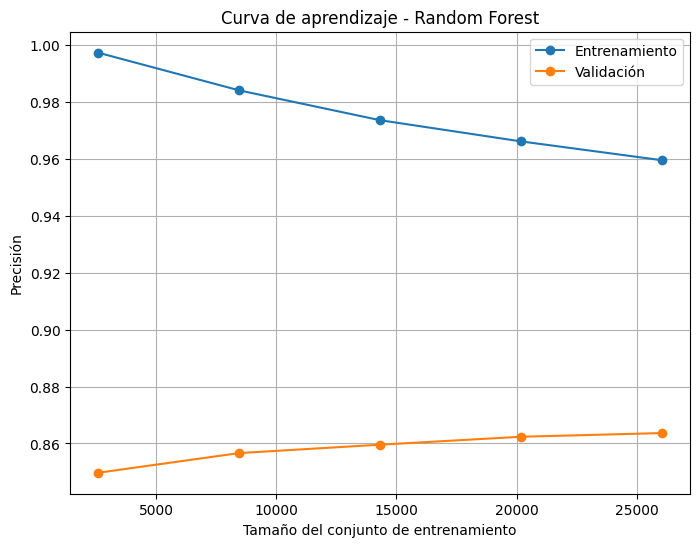

In [8]:
# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    clf.best_estimator_, X, y, cv=5, scoring='accuracy', n_jobs=-1
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Graficar curva
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validación")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.title("Curva de aprendizaje - Random Forest")
plt.legend()
plt.grid(True)
plt.show()
